<center>Using Convolutional Neural Network for classification problem<center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [5]:
# dataset's information https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

# Finding number of classes
classes = np.unique(y_train)
nClasses = len(classes)
print("This dataset has {0:d} classes".format(nClasses))


#Defining a dictionary for laebl name
y_name = {0:"T-shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}

This dataset has 10 classes


In [6]:
n_train_samples =  len(x_train)
n_test_samples = len(x_test)
dimension_image = x_train[0].shape
print("The dimension of each image is {0:d}x{1:d}, the training dataset has {2:d} sample and testing dataset has {3:d} samples".format(dimension_image[0],dimension_image[1],n_train_samples,n_test_samples))

The dimension of each image is 28x28, the training dataset has 60000 sample and testing dataset has 10000 samples


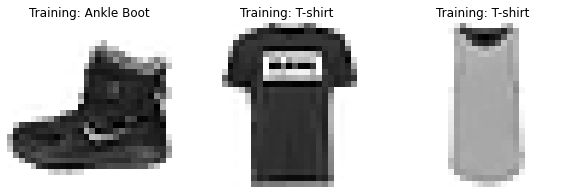

In [7]:
# Showing the first image
_, fig = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for ax, image, label in zip(fig, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Training: %s' % y_name[label])

In [8]:
# To use a CNN model the imput's format must be (widht x hight X channels)
x_train_reshape = x_train.reshape((-1,28,28,1))
x_test_reshape = x_test.reshape((-1,28,28,1))

print("New data shape: (samples, width, hight, channel)= ", x_train_reshape.shape)

New data shape: (samples, width, hight, channel)=  (60000, 28, 28, 1)


In [9]:
# changing format from int8 to float32 (best numerical precision) and normalizing the data
x_train_reshape = x_train_reshape.astype('float32')
x_test_reshape = x_test_reshape.astype('float32')
train_x = x_train_reshape / 255
test_x = x_test_reshape / 255

In [10]:
# tranform you laebels values into a categorical format or best known as one_hot encoding.
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Use the train_set_split function to crear validation training set from train dataset.
x_train_data, x_validation_data, y_train_data, y_validation_data = train_test_split(x_train_reshape,y_train_one_hot, test_size=0.20, shuffle=False) 

In [11]:
# Importing the required layers operation and activation function to build your model
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [12]:
# Definig hyperparameters
batch_size = 32
epochs = 15
num_classes = 10

In [13]:
# Buidling your CNN model
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax')) 

2022-11-22 13:11:35.412115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 13:11:35.412287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [14]:
# Compiling your model
fashion_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [15]:
# Verify the outpur shape for each layer and the number of trainable parameters.
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [16]:
# Train your model
fashion_trained_history = fashion_model.fit(x_train_data, y_train_data, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_validation_data, y_validation_data))

2022-11-22 13:15:12.787208: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15


2022-11-22 13:15:13.072038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1497/1500 [============================>.] - ETA: 0s - loss: 0.0927 - accuracy: 0.8481

2022-11-22 13:15:30.998240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 20s 11ms/step - loss: 0.0926 - accuracy: 0.8481 - val_loss: 0.0598 - val_accuracy: 0.8837
Epoch 2/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0551 - accuracy: 0.8936 - val_loss: 0.0530 - val_accuracy: 0.8967
Epoch 3/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0479 - accuracy: 0.9058 - val_loss: 0.0519 - val_accuracy: 0.8978
Epoch 4/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0435 - accuracy: 0.9146 - val_loss: 0.0499 - val_accuracy: 0.9032
Epoch 5/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0403 - accuracy: 0.9216 - val_loss: 0.0491 - val_accuracy: 0.9072
Epoch 6/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0368 - accuracy: 0.9294 - val_loss: 0.0535 - val_accuracy: 0.9086
Epoch 7/15
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0344 - accuracy: 0.9348 - val_loss: 0.0522 - val_accura

In [17]:
# Evaluating the performance of the model usign the validation data
test_eval = fashion_model.evaluate(x_test_reshape, y_test_one_hot, verbose=1)
print("The loss of the model is {0:f}, and the accurracy is {1:f}".format(test_eval[0],test_eval[1]))

  9/313 [..............................] - ETA: 2s - loss: 0.0544 - accuracy: 0.9167 

2022-11-22 13:20:26.366786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.0778 - accuracy: 0.9088
The loss of the model is 0.077794, and the accurracy is 0.908800


In [18]:
# using fashion_trained_history information to provide the performance of the model during the training stage
accuracy = fashion_trained_history.history['accuracy']
val_accuracy = fashion_trained_history.history['val_accuracy']
loss = fashion_trained_history.history['loss']
val_loss = fashion_trained_history.history['val_loss']
epochs = range(len(accuracy))

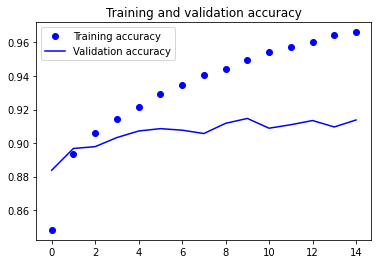

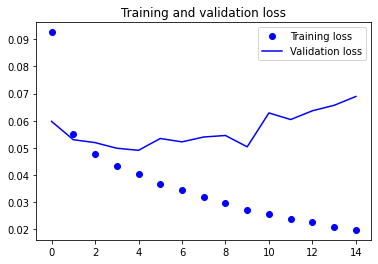

In [19]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
# Predicting the new data "test_X, y_test"
predicted = fashion_model.predict(x_test_reshape)

# taking the max argument
#predicted = np.argmax(np.round(predicted),axis=1)
print("size of predicted array ({0:d}x{1:d})".format(predicted.shape[0],predicted.shape[1]))
print("Posteriory Probabilities: ",predicted)

size of predicted array (10000x10)
Posteriory Probabilities:  [[5.3369750e-15 6.0556014e-27 3.6383261e-20 ... 2.2194071e-18
  1.3832150e-33 1.0000000e+00]
 [7.1699843e-22 1.3092713e-37 1.0000000e+00 ... 9.6713893e-23
  8.2674876e-28 8.2213273e-27]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.5416709e-34 1.0000000e+00 1.8495850e-32 ... 1.2422753e-35
  0.0000000e+00 0.0000000e+00]
 [1.7745519e-05 2.6824104e-10 4.0154373e-05 ... 8.2154226e-01
  7.2998155e-06 4.1364810e-06]]


In [23]:
# selecting the highest probability
predicted_inverse = np.argmax(predicted,axis=1)
y_test_inverse = np.argmax(y_test_one_hot, axis=1)

Found 9088 correct labels


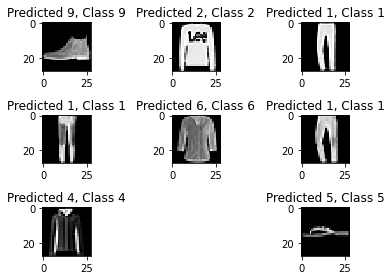

In [24]:
# Now let's select those samples that were correctly classified.
correct = np.where(predicted_inverse==y_test_inverse)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_inverse[correct], y_test_inverse[correct]))
    plt.tight_layout()

In [25]:
#Printing Classification reports
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test_inverse, predicted_inverse, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.83      0.85      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.86      0.87      0.86      1000
     Class 3       0.89      0.93      0.91      1000
     Class 4       0.81      0.90      0.85      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.78      0.69      0.73      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [26]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_true=y_test_inverse, y_pred=predicted_inverse)
print(confusion_matrix)

[[829   0  16  21   6   2 117   1   8   0]
 [  3 971   0  18   4   0   2   1   1   0]
 [ 15   0 868  13  74   0  29   0   1   0]
 [ 13   2  10 934  18   0  21   1   1   0]
 [  2   0  42  30 904   0  21   0   1   0]
 [  0   0   0   0   0 974   0  17   0   9]
 [ 84   0  71  32 113   1 690   0   9   0]
 [  0   0   0   0   0  13   0 977   0  10]
 [  2   0   0   7   2   1   2   1 985   0]
 [  0   0   0   0   1   1   1  41   0 956]]
